<a href="https://colab.research.google.com/github/juanpalominoh/Analisis-Espacial-Pobreza/blob/main/An%C3%A1lisis_Espacial_y_Modelos_de_Econometr%C3%ADa_Espacial_Pobreza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descargar datos

El link de descarga es el siguiente: https://drive.google.com/file/d/1TeWw6D_CfpY8H9afnqdzBIOhO_NjvD4e/view?usp=sharing

In [1]:
system("gdown --id 1TeWw6D_CfpY8H9afnqdzBIOhO_NjvD4e")

In [2]:
unzip("/content/DataProvincial.zip")

# Instalar paquetes y cargar librerías

In [3]:
install.packages("maptools")        # Para leer y manejar objetos espaciales
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')
install.packages('sf')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘units’




In [8]:
install.packages('terra', repos='https://rspatial.r-universe.dev')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("spdep")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(spdep)

Loading required package: sp

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sf

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 7.0.0; sf_use_s2() is TRUE



In [12]:
library("maptools")
library("RColorBrewer")

In [13]:
library(sf)
library(readxl)

# Cargar datos

In [76]:
mapa_peru <- readShapeSpatial("/content/LIMITE_PROV2.shp")

Warning message:
“readShapeSpatial is deprecated; use rgdal::readOGR or sf::st_read”
Warning message:
“readShapePoly is deprecated; use rgdal::readOGR or sf::st_read”


In [77]:
# Ejecutar el nombre de las columnas de la tabla de atributos
names(mapa_peru)

[1] "OBJECTID"   "CCDD"       "NOMBDEP"    "CCPP"       "NOMBPROV"  
[6] "IDPROV"     "Shape_Leng" "Shape_Area"

In [78]:
base_pobreza <- read_excel("/content/data_provincial.xlsx")
names(base_pobreza)

[1] "NOMBDEP"    "NOMBPROV"   "IDPROV"     "p_rur_17"   "p_jefa_17" 
[6] "tdesemp_17" "POBLACION"  "POBREZA"

In [79]:
base_pobreza

NOMBDEP,NOMBPROV,IDPROV,p_rur_17,p_jefa_17,tdesemp_17,POBLACION,POBREZA
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AMAZONAS,CHACHAPOYAS,0101,0.4370195,0.3150248,0.019542636,63188,0.2202147
AMAZONAS,BAGUA,0102,0.4898215,0.2467350,0.029811451,84672,0.3484303
AMAZONAS,BONGARA,0103,0.4547380,0.3188334,0.013655546,26830,0.3324050
AMAZONAS,CONDORCANQUI,0104,0.8431509,0.2632633,0.096827487,51344,0.5683160
AMAZONAS,LUYA,0105,0.5301343,0.2577594,0.012412297,47827,0.4814855
AMAZONAS,RODRIGUEZ DE MENDOZA,0106,0.6115155,0.2199289,0.007643535,33651,0.3321215
AMAZONAS,UTCUBAMBA,0107,0.6120497,0.2234671,0.021106504,119294,0.2989864
ANCASH,HUARAZ,0201,0.5621865,0.2998082,0.033661234,185276,0.1451227
ANCASH,AIJA,0202,0.6156025,0.3050665,0.023118177,6433,0.3173222


Combinar datos de tabla de atributos del shapefile y base de pobreza

In [80]:
peru_sh <- mapa_peru                     # Crear nuevo shape file

In [81]:
# Tabla de atributos del shapefile
mapa_peru@data

,OBJECTID,CCDD,NOMBDEP,CCPP,NOMBPROV,IDPROV,Shape_Leng,Shape_Area
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,1,01,AMAZONAS,01,CHACHAPOYAS,0101,3.8722380,0.23760537
1,2,01,AMAZONAS,02,BAGUA,0102,4.2946577,0.47236989
2,3,01,AMAZONAS,03,BONGARA,0103,3.0386613,0.23131852
3,4,01,AMAZONAS,04,CONDORCANQUI,0104,7.6173499,1.45524071
4,5,01,AMAZONAS,05,LUYA,0105,2.8682829,0.27014493
5,6,01,AMAZONAS,06,RODRIGUEZ DE MENDOZA,0106,2.7485159,0.21106135
6,7,01,AMAZONAS,07,UTCUBAMBA,0107,3.5211117,0.32526555
7,8,02,ANCASH,01,HUARAZ,0201,2.8642392,0.20646211
8,9,02,ANCASH,02,AIJA,0202,1.5766103,0.05731292


In [83]:
peru_sh@data <- merge(mapa_peru@data,    # Objeto de clase espacial
                      base_pobreza,      # Objeto de clase dataframe
                      by.x  = "IDPROV", 
                      by.y  = "IDPROV", 
                      all.x = TRUE,     
                      sort  = FALSE)   
peru_sh@data

IDPROV,OBJECTID,CCDD,NOMBDEP.x,CCPP,NOMBPROV.x,Shape_Leng,Shape_Area,NOMBDEP.y,NOMBPROV.y,p_rur_17,p_jefa_17,tdesemp_17,POBLACION,POBREZA
<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0101,1,01,AMAZONAS,01,CHACHAPOYAS,3.8722380,0.23760537,AMAZONAS,CHACHAPOYAS,0.4370195,0.3150248,0.019542636,63188,0.2202147
0102,2,01,AMAZONAS,02,BAGUA,4.2946577,0.47236989,AMAZONAS,BAGUA,0.4898215,0.2467350,0.029811451,84672,0.3484303
0103,3,01,AMAZONAS,03,BONGARA,3.0386613,0.23131852,AMAZONAS,BONGARA,0.4547380,0.3188334,0.013655546,26830,0.3324050
0104,4,01,AMAZONAS,04,CONDORCANQUI,7.6173499,1.45524071,AMAZONAS,CONDORCANQUI,0.8431509,0.2632633,0.096827487,51344,0.5683160
0105,5,01,AMAZONAS,05,LUYA,2.8682829,0.27014493,AMAZONAS,LUYA,0.5301343,0.2577594,0.012412297,47827,0.4814855
0106,6,01,AMAZONAS,06,RODRIGUEZ DE MENDOZA,2.7485159,0.21106135,AMAZONAS,RODRIGUEZ DE MENDOZA,0.6115155,0.2199289,0.007643535,33651,0.3321215
0107,7,01,AMAZONAS,07,UTCUBAMBA,3.5211117,0.32526555,AMAZONAS,UTCUBAMBA,0.6120497,0.2234671,0.021106504,119294,0.2989864
0201,8,02,ANCASH,01,HUARAZ,2.8642392,0.20646211,ANCASH,HUARAZ,0.5621865,0.2998082,0.033661234,185276,0.1451227
0202,9,02,ANCASH,02,AIJA,1.5766103,0.05731292,ANCASH,AIJA,0.6156025,0.3050665,0.023118177,6433,0.3173222


Crear el mapa de pobreza

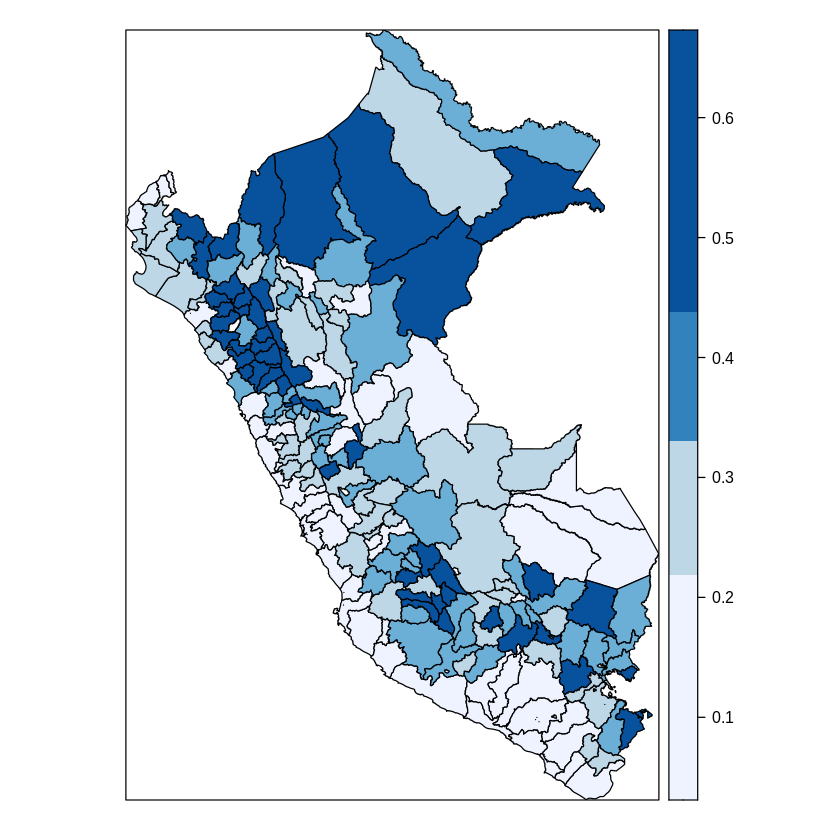

In [18]:
spplot(peru_sh, "POBREZA", 
       at = quantile(peru_sh$POBREZA, p = c(0, .25, .5, .75, 1), 
                     na.rm = TRUE),
       col.regions = brewer.pal(5, "Blues"), 
       main = "")

# Matrices Espaciales

### Matriz Reina

In [ ]:
queen.w <- poly2nb(peru_sh, row.names = peru_sh$IDPROV, queen =  TRUE)

In [19]:
summary(queen.w)
attributes(queen.w)
is.symmetric.nb(queen.w)

Neighbour list object:
Number of regions: 196 
Number of nonzero links: 1050 
Percentage nonzero weights: 2.733236 
Average number of links: 5.357143 
Link number distribution:

 1  2  3  4  5  6  7  8  9 10 11 
 4  3 20 40 47 30 29 10 10  1  2 
4 least connected regions:
0701 2109 2113 2403 with 1 link
2 most connected regions:
0906 1006 with 11 links


$class
[1] "nb"

$region.id
  [1] 0101 0102 0103 0104 0105 0106 0107 0201 0202 0203 0204 0205 0206 0207 0208
 [16] 0209 0210 0211 0212 0213 0214 0215 0216 0217 0218 0219 0220 0301 0302 0303
 [31] 0304 0305 0306 0307 0401 0402 0403 0404 0405 0406 0407 0408 0501 0502 0503
 [46] 0504 0505 0506 0507 0508 0509 0510 0511 0601 0602 0603 0604 0605 0606 0607
 [61] 0608 0609 0610 0611 0612 0613 0701 0801 0802 0803 0804 0805 0806 0807 0808
 [76] 0809 0810 0811 0812 0813 0901 0902 0903 0904 0905 0906 0907 1001 1002 1003
 [91] 1004 1005 1006 1007 1008 1009 1010 1011 1101 1102 1103 1104 1105 1201 1202
[106] 1203 1204 1205 1206 1207 1208 1209 1301 1302 1303 1304 1305 1306 1307 1308
[121] 1309 1310 1311 1312 1401 1402 1403 1501 1502 1503 1504 1505 1506 1507 1508
[136] 1509 1510 1601 1602 1603 1604 1605 1606 1607 1608 1701 1702 1703 1801 1802
[151] 1803 1901 1902 1903 2001 2002 2003 2004 2005 2006 2007 2008 2101 2102 2103
[166] 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2201 2202 2203 2204 2205


[1] TRUE

In [20]:
listw2mat(nb2listw(queen.w, style = "W"))           # Si se pone B se tiene la matriz 1 y 0

0101,0.0000000,0.0000000,0.1428571,0.0000000,0.1428571,0.1428571,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0102,0.0000000,0.0000000,0.0000000,0.2500000,0.0000000,0.0000000,0.2500000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0103,0.1428571,0.0000000,0.0000000,0.1428571,0.1428571,0.0000000,0.1428571,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0104,0.0000000,0.2500000,0.2500000,0.0000000,0.0000000,0.0000000,0.2500000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0105,0.2000000,0.0000000,0.2000000,0.0000000,0.0000000,0.0000000,0.2000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0106,0.2000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0107,0.0000000,0.1428571,0.1428571,0.1428571,0.1428571,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0201,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.1428571,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0202,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.3333333,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0203,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0204,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
rowSums(listw2mat(nb2listw(queen.w, style = "W")))  # Suma por filas

0101 0102 0103 0104 0105 0106 0107 0201 0202 0203 0204 0205 0206 0207 0208 0209 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0210 0211 0212 0213 0214 0215 0216 0217 0218 0219 0220 0301 0302 0303 0304 0305 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0306 0307 0401 0402 0403 0404 0405 0406 0407 0408 0501 0502 0503 0504 0505 0506 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0507 0508 0509 0510 0511 0601 0602 0603 0604 0605 0606 0607 0608 0609 0610 0611 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0612 0613 0701 0801 0802 0803 0804 0805 0806 0807 0808 0809 0810 0811 0812 0813 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0901 0902 0903 0904 0905 0906 0907 1001 1002 1003 1004 1005 1006 1007 1008 1009 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1010 1011 1101 1102 1103 1104 1105 1201 1202 1203 1204 1205 1206 1207 1208 1209 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1401 1402 1403 1501 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1502 1503 1504 1505 1506 1507 1508 1509 1510 1601 1602 1603 1604 1605 1606 1607 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1608 1701 1702 1703 1801 1802 1803 1901 1902 1903 2001 2002 2003 2004 2005 2006 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
2007 2008 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2201 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
2202 2203 2204 2205 2206 2207 2208 2209 2210 2301 2302 2303 2304 2401 2402 2403 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
2501 2502 2503 2504 
   1    1    1    1

In [22]:
rowSums(listw2mat(nb2listw(queen.w, style = "B")))  # Entrega el número de vecinos

0101 0102 0103 0104 0105 0106 0107 0201 0202 0203 0204 0205 0206 0207 0208 0209 
   7    4    7    4    5    5    7    7    3    3    4    9    4    6    4    4 
0210 0211 0212 0213 0214 0215 0216 0217 0218 0219 0220 0301 0302 0303 0304 0305 
   9    6    5    5    4    6    6    5    7    5    9    7    9    7    4    6 
0306 0307 0401 0402 0403 0404 0405 0406 0407 0408 0501 0502 0503 0504 0505 0506 
   4    3    5    6    7    3    8    7    5    6    7    4    3    8    5    9 
0507 0508 0509 0510 0511 0601 0602 0603 0604 0605 0606 0607 0608 0609 0610 0611 
   7    3    4    6    6    7    6    7    8    7    4    6    7    3    4    6 
0612 0613 0701 0801 0802 0803 0804 0805 0806 0807 0808 0809 0810 0811 0812 0813 
   4    4    1    5    5    6    6    5    5    9    6   10    6    3    8    4 
0901 0902 0903 0904 0905 0906 0907 1001 1002 1003 1004 1005 1006 1007 1008 1009 
   8    4    5    5    4   11    5    6    5    6    7    5   11    6    6    5 
1010 1011 1101 1102 1103 1104 1105 1201 1202 1203 1204 1205 1206 1207 1208 1209 
   8    3    4    4    4    4    4    6    5    5    7    5    9    4    7    3 
1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1401 1402 1403 1501 
   4    5    7    4    4    7    3    9    5    7    5    5    6    5    7    5 
1502 1503 1504 1505 1506 1507 1508 1509 1510 1601 1602 1603 1604 1605 1606 1607 
   4    5    4    4    5    6    6    5    9    4    6    4    3    7    7    5 
1608 1701 1702 1703 1801 1802 1803 1901 1902 1903 2001 2002 2003 2004 2005 2006 
   2    5    7    3    7    5    3    9    4    8    6    4    5    4    4    6 
2007 2008 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2201 
   3    3    5    6    8    2    5    5    5    6    1    4    7    3    1    8 
2202 2203 2204 2205 2206 2207 2208 2209 2210 2301 2302 2303 2304 2401 2402 2403 
   7    5    5    5    7    5    4    5    5    3    5    5    4    3    3    1 
2501 2502 2503 2504 
   6    8    4    2

### Matriz Roca

In [23]:
rook.w  <- poly2nb(peru_sh, row.names = peru_sh$IDPROV, queen =  FALSE)

In [24]:
rowSums(listw2mat(nb2listw(rook.w)))

0101 0102 0103 0104 0105 0106 0107 0201 0202 0203 0204 0205 0206 0207 0208 0209 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0210 0211 0212 0213 0214 0215 0216 0217 0218 0219 0220 0301 0302 0303 0304 0305 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0306 0307 0401 0402 0403 0404 0405 0406 0407 0408 0501 0502 0503 0504 0505 0506 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0507 0508 0509 0510 0511 0601 0602 0603 0604 0605 0606 0607 0608 0609 0610 0611 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0612 0613 0701 0801 0802 0803 0804 0805 0806 0807 0808 0809 0810 0811 0812 0813 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0901 0902 0903 0904 0905 0906 0907 1001 1002 1003 1004 1005 1006 1007 1008 1009 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1010 1011 1101 1102 1103 1104 1105 1201 1202 1203 1204 1205 1206 1207 1208 1209 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1401 1402 1403 1501 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1502 1503 1504 1505 1506 1507 1508 1509 1510 1601 1602 1603 1604 1605 1606 1607 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1608 1701 1702 1703 1801 1802 1803 1901 1902 1903 2001 2002 2003 2004 2005 2006 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
2007 2008 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2201 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
2202 2203 2204 2205 2206 2207 2208 2209 2210 2301 2302 2303 2304 2401 2402 2403 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
2501 2502 2503 2504 
   1    1    1    1

### K vecinos más cercanos

In [25]:
coords <- coordinates(peru_sh)
coords

In [ ]:
k1neigh <- knn2nb(knearneigh(coords, k = 1)) # 1 vecino más cercano
k2neigh <- knn2nb(knearneigh(coords, k = 2)) # 2 vecinos más cercanos
k3neigh <- knn2nb(knearneigh(coords, k = 3)) # 3 vecinos más cercanos
k4neigh <- knn2nb(knearneigh(coords, k = 4)) # 4 vecinos más cercanos
k5neigh <- knn2nb(knearneigh(coords, k = 5)) # 5 vecinos más cercanos

### Distancia Inversa

In [26]:
dist.mat <- as.matrix(dist(coords, method = "euclidean")) # Euclidean Distance
dist.mat.inv <- 1 / dist.mat
diag(dist.mat.inv) <- 0
dist.mat.inv[1:5, 1:5]

,0,1,2,3,4
0,0.0000000,0.6715559,1.3157274,0.4375181,3.0739819
1,0.6715559,0.0000000,1.2542479,1.0099903,0.7826487
2,1.3157274,1.2542479,0.0000000,0.6554273,1.4887392
3,0.4375181,1.0099903,0.6554273,0.0000000,0.4636458
4,3.0739819,0.7826487,1.4887392,0.4636458,0.0000000


### Distancia Inversa Estandarizada

In [ ]:
dist.mat.inve <- mat2listw(dist.mat.inv, style = "W", row.names = peru_sh$IDPROV) 

In [27]:
summary(dist.mat.inve)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 196 
Number of nonzero links: 38220 
Percentage nonzero weights: 99.4898 
Average number of links: 195 
Link number distribution:

195 
196 
196 least connected regions:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 with 195 links
196 most connected regions:
0 1 2 3 4 5 6 7 8 9 10 11 12 13

In [28]:
rowSums(listw2mat(mat2listw(dist.mat.inv, style = "W", row.names = peru_sh$IDPROV)))

0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1

In [29]:
rowSums(listw2mat(mat2listw(dist.mat.inv, style = "B", row.names = peru_sh$IDPROV)))

0        1        2        3        4        5        6        7 
68.97408 50.90916 58.81898 39.89352 68.33832 65.89345 60.48611 84.73975 
       8        9       10       11       12       13       14       15 
80.89678 89.78381 93.17927 80.09521 91.36513 93.65599 70.59676 83.98349 
      16       17       18       19       20       21       22       23 
85.89360 69.38359 84.57131 92.05993 74.17864 83.12636 88.99149 80.50416 
      24       25       26       27       28       29       30       31 
72.76512 84.56888 87.63881 63.85991 65.00757 61.58587 61.86195 64.66148 
      32       33       34       35       36       37       38       39 
67.21605 64.90919 45.53157 42.58177 45.70182 51.37857 49.30451 51.69050 
      40       41       42       43       44       45       46       47 
41.05015 56.27622 69.08299 68.46323 64.86370 65.66407 63.95740 55.43184 
      48       49       50       51       52       53       54       55 
54.87311 55.72918 63.53743 68.36123 68.64008 78.31219 79.79248 73.83982 
      56       57       58       59       60       61       62       63 
71.15550 74.60725 66.44157 74.34501 58.29830 51.41485 78.41506 75.15122 
      64       65       66       67       68       69       70       71 
78.13286 72.97800 60.91527 63.27397 61.22827 64.88958 57.01939 56.45888 
      72       73       74       75       76       77       78       79 
54.94613 59.03865 53.34846 53.08427 64.44363 54.07662 51.27842 62.89056 
      80       81       82       83       84       85       86       87 
67.27135 72.59751 70.14648 62.69928 71.20807 61.19676 67.88814 76.31157 
      88       89       90       91       92       93       94       95 
75.99671 85.66623 82.91802 81.00440 67.40158 76.51179 70.01395 56.80435 
      96       97       98       99      100      101      102      103 
79.82245 84.90265 51.73603 57.42031 48.43789 54.53553 53.47094 69.45696 
     104      105      106      107      108      109      110      111 
67.97648 62.90763 68.62011 70.77759 56.17134 69.58340 68.71244 67.72275 
     112      113      114      115      116      117      118      119 
69.91874 68.31784 74.25203 66.00753 77.24349 78.02262 65.41129 75.74242 
     120      121      122      123      124      125      126      127 
78.38806 80.67262 77.84553 70.46299 62.57598 60.09320 52.42742 62.73472 
     128      129      130      131      132      133      134      135 
67.60567 77.67161 68.28760 57.09476 68.83374 64.91776 68.21357 75.06842 
     136      137      138      139      140      141      142      143 
62.85282 26.16501 43.54514 31.88251 24.10315 35.92966 50.07182 37.80634 
     144      145      146      147      148      149      150      151 
22.29370 37.22193 44.85187 35.26063 43.38439 45.07287 38.24014 72.29291 
     152      153      154      155      156      157      158      159 
76.70606 58.02389 46.44399 45.27508 52.91011 49.59800 40.74383 42.73047 
     160      161      162      163      164      165      166      167 
38.72703 43.87334 44.18062 47.32141 44.16258 38.87814 40.88099 44.96441 
     168      169      170      171      172      173      174      175 
49.06720 50.50247 41.81794 43.59043 47.62729 37.51167 36.73490 57.96433 
     176      177      178      179      180      181      182      183 
61.06835 63.12909 65.13962 56.04393 67.62197 58.33984 60.44004 51.85138 
     184      185      186      187      188      189      190      191 
69.17431 34.96488 42.25898 39.49839 38.32112 40.66517 38.85846 38.65858 
     192      193      194      195 
45.01303 45.37080 58.14269 37.76422

# Construcción de la Variable Rezagada Espacialmente

Matriz X

In [30]:
X <- cbind(peru_sh$p_rur_17, peru_sh$p_jefa_17, peru_sh$tdesemp_17)
head(X, 5)

0.4370195,0.3150248,0.01954264
0.4898215,0.2467350,0.02981145
0.4547380,0.3188334,0.01365555
0.8431509,0.2632633,0.09682749
0.5301343,0.2577594,0.01241230


Matriz $WX$

In [31]:
WX <- lag.listw(nb2listw(queen.w), X)
head(WX)

0.5286664,0.2464258,0.01664126
0.7459798,0.2347661,0.03686851
0.5138039,0.2468240,0.03785176
0.5531596,0.2496326,0.03401627
0.6190609,0.2791995,0.01982903
0.3618334,0.2235835,0.01979021


# Moran Scatterplot

### Moran Scatterplot (Matriz Reina)

Potentially influential observations of
	 lm(formula = wx ~ x) :

                       dfb.1_ dfb.x dffit   cov.r   cook.d hat    
UTCUBAMBA               0.09  -0.02  0.17    0.96_*  0.01   0.01  
HUAMANGA                0.14  -0.08  0.18    0.97_*  0.02   0.01  
CAJAMARCA               0.07   0.03  0.23    0.92_*  0.02   0.01  
CHOTA                   0.01  -0.02 -0.02    1.03_*  0.00   0.02  
SAN PABLO               0.02  -0.03 -0.04    1.05_*  0.00   0.03_*
CHINCHA                 0.01  -0.01  0.01    1.04_*  0.00   0.02  
NASCA                  -0.08   0.07 -0.08    1.03_*  0.00   0.03  
PALPA                  -0.01   0.01 -0.01    1.03_*  0.00   0.02  
PISCO                  -0.04   0.04 -0.04    1.03_*  0.00   0.02  
CHICLAYO                0.32  -0.26  0.33_*  0.96_*  0.05   0.01  
MAYNAS                  0.19  -0.12  0.22    0.95_*  0.02   0.01  
DANIEL ALCIDES CARRION  0.20  -0.29 -0.32_*  0.99    0.05   0.02  


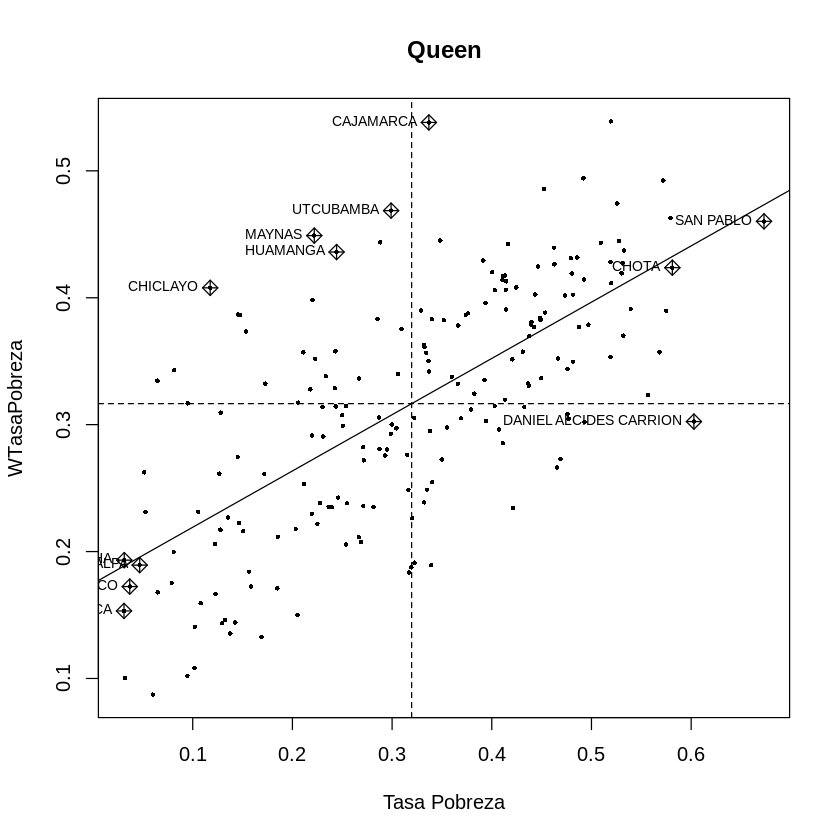

In [34]:
moran.plot(peru_sh$POBREZA, 
           listw = nb2listw(queen.w),
           zero.policy=T, 
           xlab = "Tasa Pobreza",
           ylab = expression(WTasaPobreza),
           labels = as.character(peru_sh$NOMBPROV.x), 
           pch = 16, col="black", cex=0.5, quiet=F,
           main = "Queen")

### Moran Scatterplot (Matriz Roca)

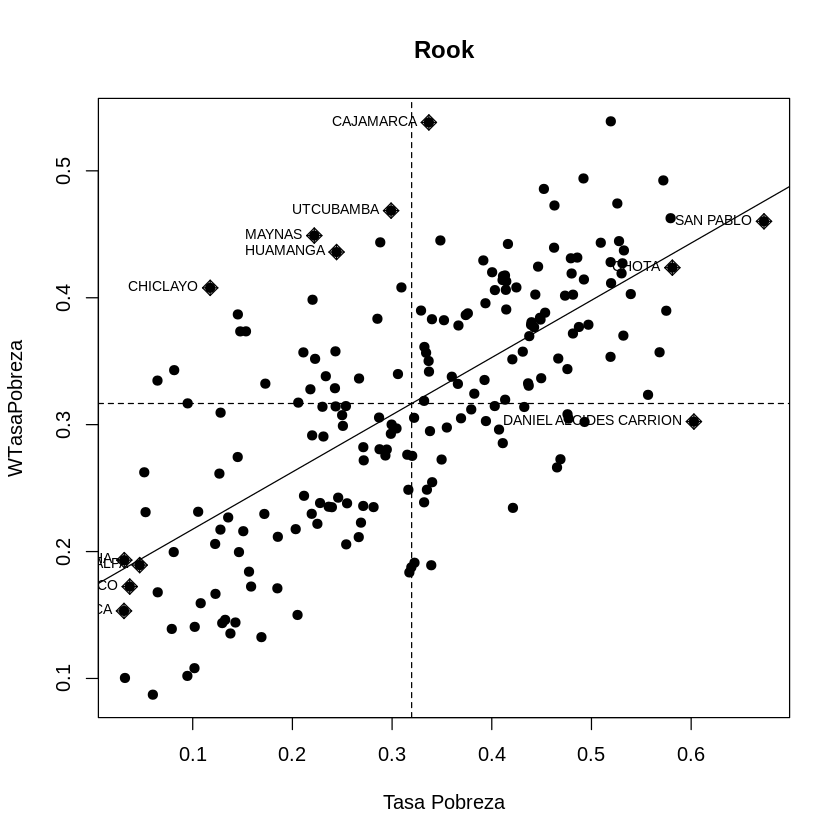

In [35]:
moran.plot(peru_sh$POBREZA, 
           listw = nb2listw(rook.w),
           xlab = "Tasa Pobreza",
           ylab = expression(WTasaPobreza),
           labels = as.character(peru_sh$NOMBPROV.x), pch = 19,
           main = "Rook")

### Moran Scatterplot (Matriz 5 vecinos más cercanos)

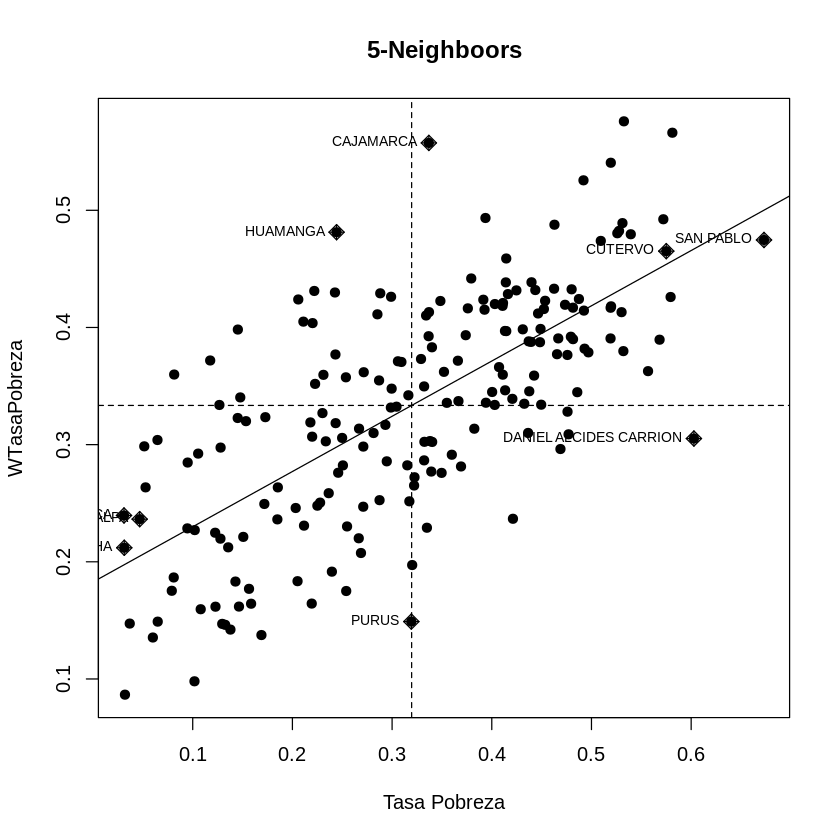

In [36]:
moran.plot(peru_sh$POBREZA, 
           listw = nb2listw(k5neigh),
           xlab = "Tasa Pobreza",
           ylab = expression(WTasaPobreza),
           labels = as.character(peru_sh$NOMBPROV.x), pch = 19,
           main = "5-Neighboors")

### Moran Scatterplot (Matriz de distancia inversa)

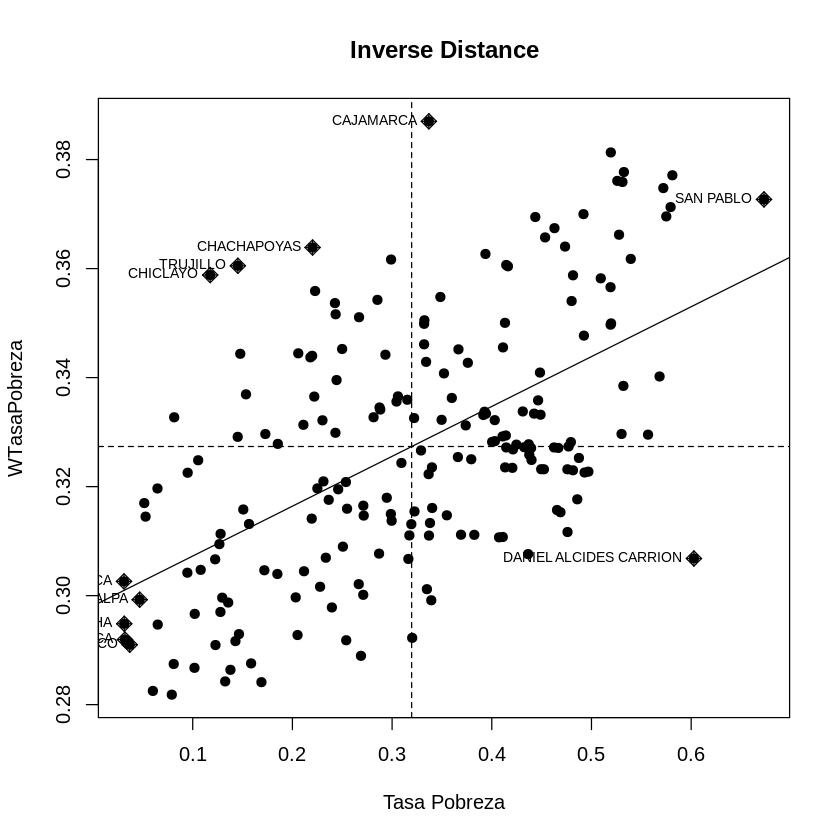

In [37]:
moran.plot(peru_sh$POBREZA, 
           listw = dist.mat.inve,
           xlab = "Tasa Pobreza",
           ylab = expression(WTasaPobreza),
           labels = as.character(peru_sh$NOMBPROV.x), pch = 19,
           main = "Inverse Distance")

# Moran I Tests

### Moran I Normalization

In [38]:
moran.test(peru_sh$POBREZA, listw = nb2listw(queen.w), 
           randomisation = FALSE,  alternative = 'two.sided')


	Moran I test under normality

data:  peru_sh$POBREZA  
weights: nb2listw(queen.w)    

Moran I statistic standard deviate = 9.9127, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.443415269      -0.005128205       0.002047513 


**Interpretación**: El I de Moran es positivo (0.443)y significativo al 0.01%. Se rechaza la H0 de no autocorrelación espacial global. Por lo tanto, existe conformación de clusters positivos o autocorrelación espacial positiva a nivel provincial para la pobreza en Perú.

In [39]:
moran.test(peru_sh$POBREZA, listw = nb2listw(rook.w), 
           randomisation = FALSE,  alternative = 'two.sided')


	Moran I test under normality

data:  peru_sh$POBREZA  
weights: nb2listw(rook.w)    

Moran I statistic standard deviate = 10.01, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.451012106      -0.005128205       0.002076321 


In [40]:
moran.test(peru_sh$POBREZA, listw = nb2listw(k2neigh), 
           randomisation = FALSE,  alternative = 'two.sided')


	Moran I test under normality

data:  peru_sh$POBREZA  
weights: nb2listw(k2neigh)    

Moran I statistic standard deviate = 9.2039, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.597600291      -0.005128205       0.004288422 


In [41]:
moran.test(peru_sh$POBREZA, listw = nb2listw(k3neigh), 
           randomisation = FALSE,  alternative = 'two.sided')


	Moran I test under normality

data:  peru_sh$POBREZA  
weights: nb2listw(k3neigh)    

Moran I statistic standard deviate = 10.681, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.565397768      -0.005128205       0.002853015 


In [42]:
moran.test(peru_sh$POBREZA, listw = nb2listw(k4neigh), 
           randomisation = FALSE,  alternative = 'two.sided')


	Moran I test under normality

data:  peru_sh$POBREZA  
weights: nb2listw(k4neigh)    

Moran I statistic standard deviate = 10.936, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.502748786      -0.005128205       0.002156927 


In [43]:
moran.test(peru_sh$POBREZA, listw = nb2listw(k5neigh), 
           randomisation = FALSE,  alternative = 'two.sided')


	Moran I test under normality

data:  peru_sh$POBREZA  
weights: nb2listw(k5neigh)    

Moran I statistic standard deviate = 11.449, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.471547269      -0.005128205       0.001733463 


In [44]:
moran.test(peru_sh$POBREZA, listw = dist.mat.inve, 
           randomisation = FALSE,  alternative = 'two.sided')


	Moran I test under normality

data:  peru_sh$POBREZA  
weights: dist.mat.inve    

Moran I statistic standard deviate = 12.287, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
     9.148526e-02     -5.128205e-03      6.182667e-05 


### Moran I Randomization

In [45]:
moran.test(peru_sh$POBREZA, listw = nb2listw(queen.w), alternative = 'two.sided')


	Moran I test under randomisation

data:  peru_sh$POBREZA  
weights: nb2listw(queen.w)    

Moran I statistic standard deviate = 9.8911, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.443415269      -0.005128205       0.002056447 


### Moran I MonteCarlo

In [46]:
set.seed(1234)
moran.mc(peru_sh$POBREZA, listw = nb2listw(queen.w), nsim = 9999)


	Monte-Carlo simulation of Moran I

data:  peru_sh$POBREZA 
weights: nb2listw(queen.w)  
number of simulations + 1: 1000 

statistic = 0.44342, observed rank = 1000, p-value = 0.001
alternative hypothesis: greater


# Correlogramas Espaciales

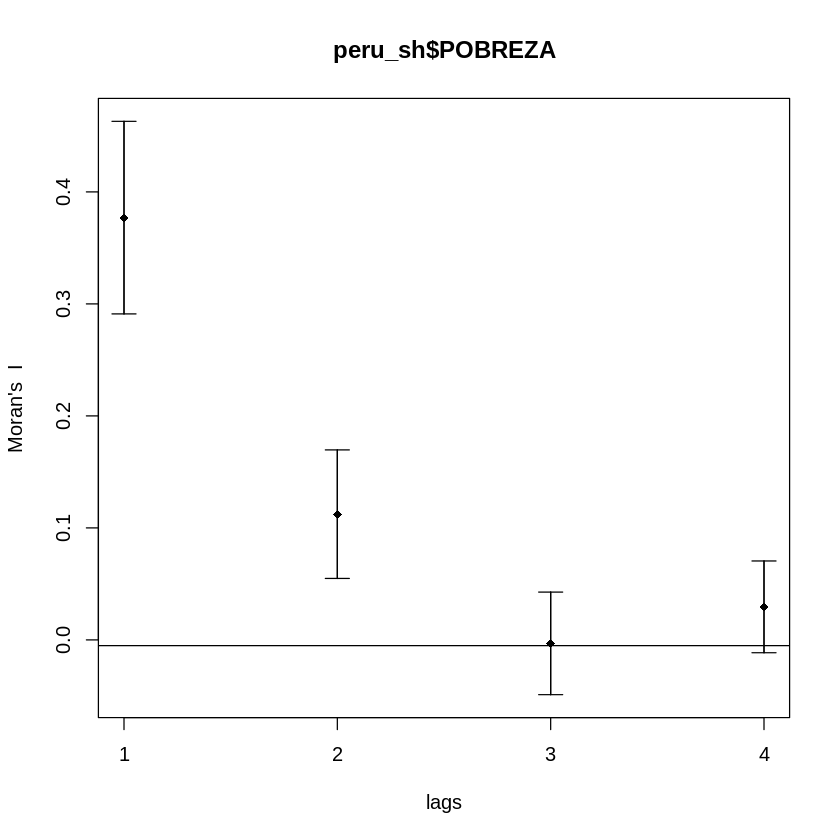

In [47]:
plot(sp.correlogram(neighbours = queen.w,
                    var = peru_sh$POBREZA,
                    order = 4,
                    method = "I",
                    style = "B")) 

Para corregir endogeneidad en modelos espaciales, el instrumento viene a ser $W^2$, $W^3$, ..., $W^n$

# LISA

## Local moran


In [48]:
local.mi <- localmoran(peru_sh$POBREZA,
                       listw = nb2listw(queen.w),
                       alternative = "two.sided")
local.mi

,Ii,E.Ii,Var.Ii,Z.Ii,Pr(z != E(Ii))
0101,-0.36719353,-2.374604e-03,0.0642795472,-1.43893427,0.150169146
0102,0.16959466,-1.996581e-04,0.0096300375,1.73025119,0.083585407
0103,0.02496709,-3.935540e-05,0.0010678283,0.76524621,0.444124947
0104,0.43635945,-1.486765e-02,0.7065851740,0.53680050,0.591405427
0105,0.62835128,-6.298443e-03,0.2402852329,1.29470419,0.195422293
0106,-0.04738958,-3.763065e-05,0.0014446523,-1.24582266,0.212829508
0107,-0.14405042,-1.022263e-04,0.0027735261,-2.73331763,0.006269983
0201,0.36890502,-7.317971e-03,0.1971128669,0.84739881,0.396772869
0202,0.01458366,-1.257131e-06,0.0000812857,1.61769599,0.105728130
0203,0.41852453,-2.018986e-03,0.1302836559,1.16510744,0.243975507


Incorporando estas dos variables a la base shape


In [49]:
peru_sh$lmi   <- local.mi[, 1]
peru_sh$lmi.p <- local.mi[, 5]

Crear una nueva variable dentro de la base de datos

In [50]:
peru_sh$lmi.p.sig <- as.factor(ifelse(local.mi[,5] < 0.001, "Sig p < 0.001", 
                          ifelse(local.mi[,5] < 0.05 , "Sig p< 0.05", "NS")))

In [51]:
peru_sh@data

IDPROV,OBJECTID,CCDD,NOMBDEP.x,CCPP,NOMBPROV.x,Shape_Leng,Shape_Area,NOMBDEP.y,NOMBPROV.y,p_rur_17,p_jefa_17,tdesemp_17,POBLACION,POBREZA,lmi,lmi.p,lmi.p.sig
<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0101,1,01,AMAZONAS,01,CHACHAPOYAS,3.8722380,0.23760537,AMAZONAS,CHACHAPOYAS,0.4370195,0.3150248,0.019542636,63188,0.2202147,-0.36719353,0.150169146,NS
0102,2,01,AMAZONAS,02,BAGUA,4.2946577,0.47236989,AMAZONAS,BAGUA,0.4898215,0.2467350,0.029811451,84672,0.3484303,0.16959466,0.083585407,NS
0103,3,01,AMAZONAS,03,BONGARA,3.0386613,0.23131852,AMAZONAS,BONGARA,0.4547380,0.3188334,0.013655546,26830,0.3324050,0.02496709,0.444124947,NS
0104,4,01,AMAZONAS,04,CONDORCANQUI,7.6173499,1.45524071,AMAZONAS,CONDORCANQUI,0.8431509,0.2632633,0.096827487,51344,0.5683160,0.43635945,0.591405427,NS
0105,5,01,AMAZONAS,05,LUYA,2.8682829,0.27014493,AMAZONAS,LUYA,0.5301343,0.2577594,0.012412297,47827,0.4814855,0.62835128,0.195422293,NS
0106,6,01,AMAZONAS,06,RODRIGUEZ DE MENDOZA,2.7485159,0.21106135,AMAZONAS,RODRIGUEZ DE MENDOZA,0.6115155,0.2199289,0.007643535,33651,0.3321215,-0.04738958,0.212829508,NS
0107,7,01,AMAZONAS,07,UTCUBAMBA,3.5211117,0.32526555,AMAZONAS,UTCUBAMBA,0.6120497,0.2234671,0.021106504,119294,0.2989864,-0.14405042,0.006269983,Sig p< 0.05
0201,8,02,ANCASH,01,HUARAZ,2.8642392,0.20646211,ANCASH,HUARAZ,0.5621865,0.2998082,0.033661234,185276,0.1451227,0.36890502,0.396772869,NS
0202,9,02,ANCASH,02,AIJA,1.5766103,0.05731292,ANCASH,AIJA,0.6156025,0.3050665,0.023118177,6433,0.3173222,0.01458366,0.105728130,NS


Formación de cluster

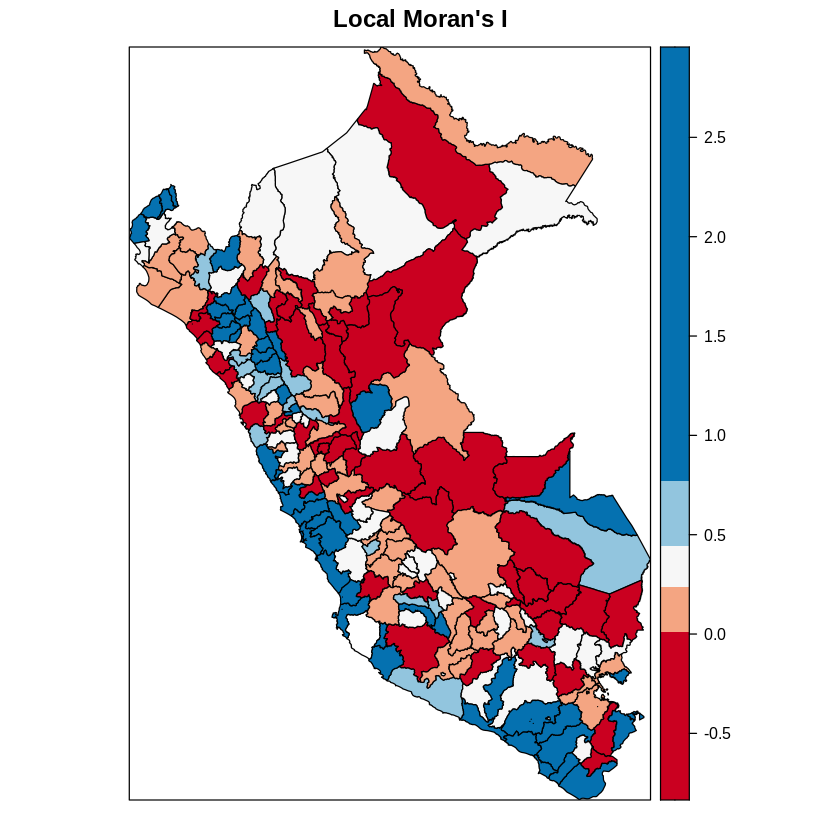

In [52]:
spplot(peru_sh, "lmi", at = summary(peru_sh$lmi), 
       col.regions = brewer.pal(5, "RdBu"), 
       main = "Local Moran's I")

Los clusters significativos

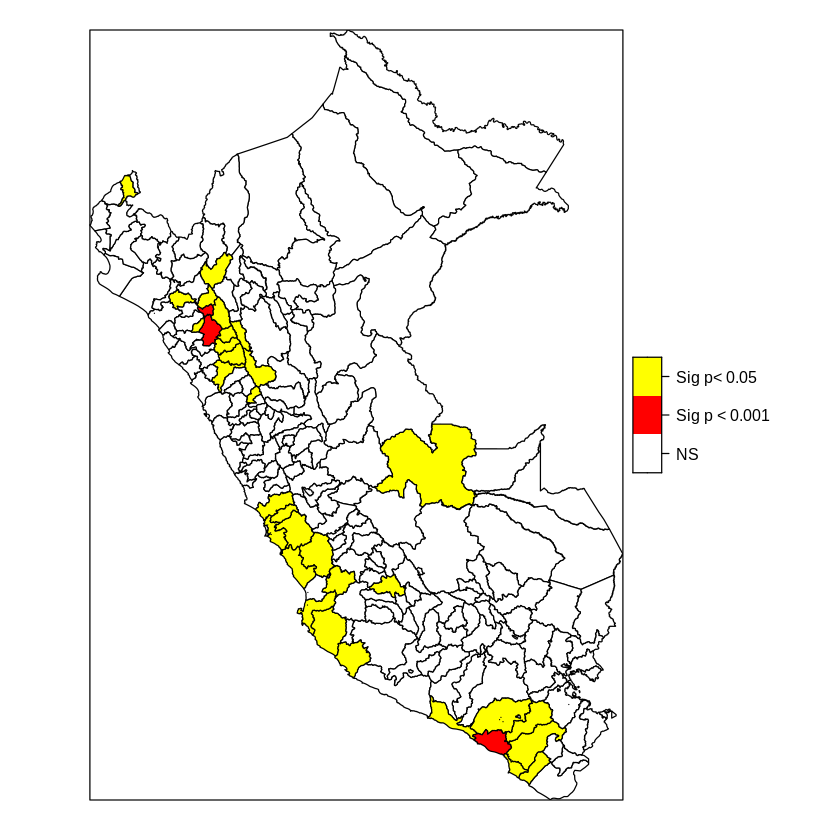

In [53]:
spplot(peru_sh, 
       "lmi.p.sig", 
       col.regions = c("white", "Red", "Yellow"))

In [54]:
# Geary's C
geary.test(peru_sh$POBREZA, listw=nb2listw(queen.w), zero.policy=T)


	Geary C test under randomisation

data:  peru_sh$POBREZA 
weights: nb2listw(queen.w) 

Geary C statistic standard deviate = 9.9876, p-value < 2.2e-16
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
      0.527096335       1.000000000       0.002241926 


# Modelos de Econometría Espacial

## Taxonomias de Modelos

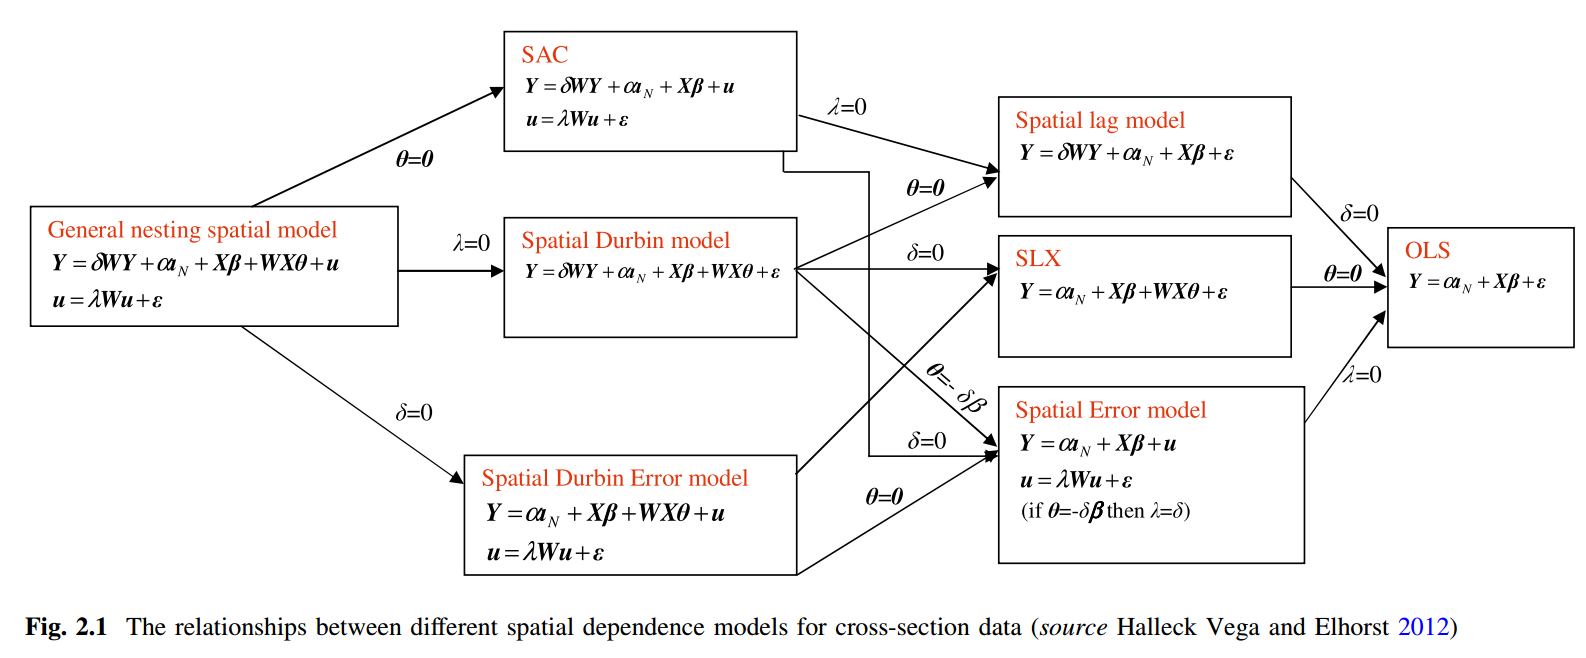

In [56]:
install.packages("spatialreg")
library(spatialreg)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Creación de la matriz espacial reina

In [57]:
queen.w <- poly2nb(peru_sh, row.names = peru_sh$IDPROV, queen =  TRUE)
W <- nb2listw(queen.w, style = "W", zero.policy = TRUE)           # Si se pone B se tiene la matriz 1 y 0
W

Characteristics of weights list object:
Neighbour list object:
Number of regions: 196 
Number of nonzero links: 1050 
Percentage nonzero weights: 2.733236 
Average number of links: 5.357143 

Weights style: W 
Weights constants summary:
    n    nn  S0       S1       S2
W 196 38416 196 80.80596 811.5336

Especificación del modelo:

In [59]:
model <- POBREZA ~ p_rur_17 + tdesemp_17

### Modelo OLS

In [60]:
ols_model <- lm(model, data=peru_sh@data)
summary(ols_model)


Call:
lm(formula = model, data = peru_sh@data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27961 -0.06781  0.00366  0.06732  0.36634 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.06119    0.02113   2.897  0.00421 ** 
p_rur_17     0.47770    0.03341  14.298  < 2e-16 ***
tdesemp_17   0.87794    0.34878   2.517  0.01264 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.101 on 193 degrees of freedom
Multiple R-squared:  0.5288,	Adjusted R-squared:  0.5239 
F-statistic: 108.3 on 2 and 193 DF,  p-value: < 2.2e-16


## Testeando la autocorrelación espacial de los residuos

### Moran's I test

La prueba I de Moran se desarrolló originalmente como un análogo bidimensional de la prueba de Durbin-Watson.
\begin{gather*}
I=\frac{e'We}{e'e}
\end{gather*}
donde $e=y-X\beta$ es un vector de residuos OLS $\beta=(X'X)^{-1}(X'Y)$

In [61]:
moran.lm<-lm.morantest(ols_model, W, alternative="two.sided")
print(moran.lm)


	Global Moran I for regression residuals

data:  
model: lm(formula = model, data = peru_sh@data)
weights: W

Moran I statistic standard deviate = 6.1361, p-value = 8.459e-10
alternative hypothesis: two.sided
sample estimates:
Observed Moran I      Expectation         Variance 
     0.265746671     -0.009674732      0.002014725 



### Test Multiplicador de Lagrange

In [62]:
LM <- lm.LMtests(ols_model, W, test="all")
print(LM)


	Lagrange multiplier diagnostics for spatial dependence

data:  
model: lm(formula = model, data = peru_sh@data)
weights: W

LMerr = 33.574, df = 1, p-value = 6.86e-09


	Lagrange multiplier diagnostics for spatial dependence

data:  
model: lm(formula = model, data = peru_sh@data)
weights: W

LMlag = 36.566, df = 1, p-value = 1.475e-09


	Lagrange multiplier diagnostics for spatial dependence

data:  
model: lm(formula = model, data = peru_sh@data)
weights: W

RLMerr = 2.7539, df = 1, p-value = 0.09702


	Lagrange multiplier diagnostics for spatial dependence

data:  
model: lm(formula = model, data = peru_sh@data)
weights: W

RLMlag = 5.7463, df = 1, p-value = 0.01652


	Lagrange multiplier diagnostics for spatial dependence

data:  
model: lm(formula = model, data = peru_sh@data)
weights: W

SARMA = 39.32, df = 2, p-value = 2.895e-09



## Regresiones Espaciales

### Modelo SAR o SLM

In [63]:
sar_model <- lagsarlm(model, 
                  data=peru_sh@data, W)
summary(sar_model)


Call:lagsarlm(formula = model, data = peru_sh@data, listw = W)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.2793320 -0.0604933  0.0049259  0.0594934  0.3493293 

Type: lag 
Coefficients: (asymptotic standard errors) 
             Estimate Std. Error z value  Pr(>|z|)
(Intercept) -0.026184   0.022184 -1.1803  0.237868
p_rur_17     0.359226   0.035202 10.2048 < 2.2e-16
tdesemp_17   0.873016   0.311572  2.8020  0.005079

Rho: 0.45304, LR test value: 34.662, p-value: 3.9227e-09
Asymptotic standard error: 0.067908
    z-value: 6.6713, p-value: 2.5346e-11
Wald statistic: 44.507, p-value: 2.5346e-11

Log likelihood: 190.0094 for lag model
ML residual variance (sigma squared): 0.0080498, (sigma: 0.089721)
Number of observations: 196 
Number of parameters estimated: 5 
AIC: -370.02, (AIC for lm: -337.36)
LM test for residual autocorrelation
test value: 2.0295, p-value: 0.15427


In [64]:
# Comparamos residuos
peru_sh@data$ols_model.res<-resid(ols_model) #residuos OLS
peru_sh@data$sar_model.res<-resid(sar_model) #residuos SLM

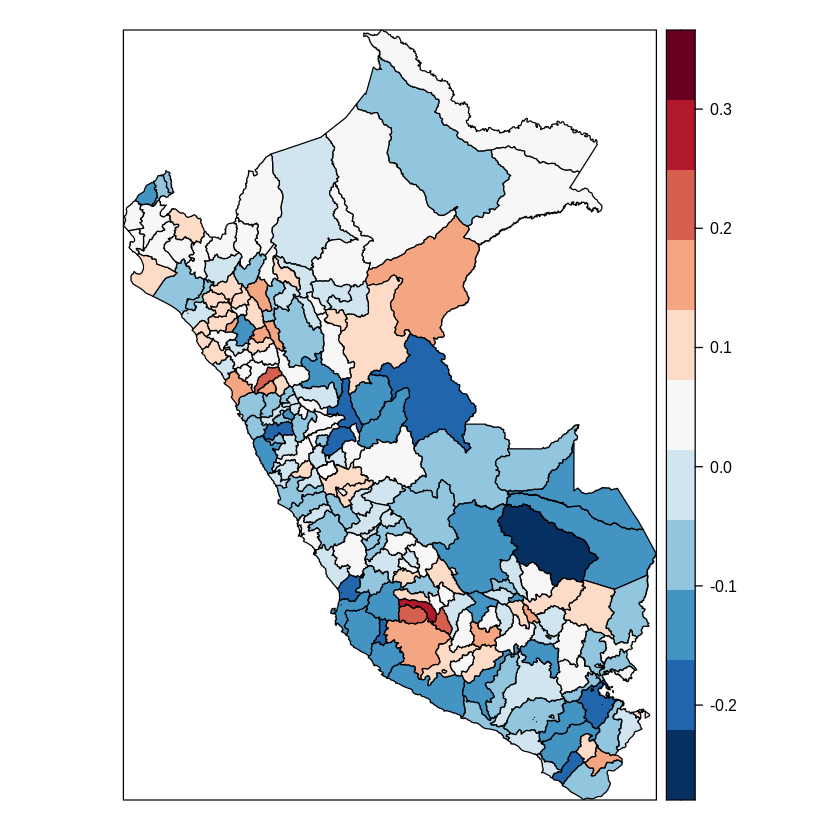

In [65]:
# Gráficando los residuos OLS
spplot(peru_sh,"ols_model.res", 
       at=seq(min(peru_sh@data$ols_model.res, na.rm=TRUE),
              max(peru_sh@data$ols_model.res,na.rm=TRUE),length=12),
       col.regions=rev(brewer.pal(11,"RdBu")))

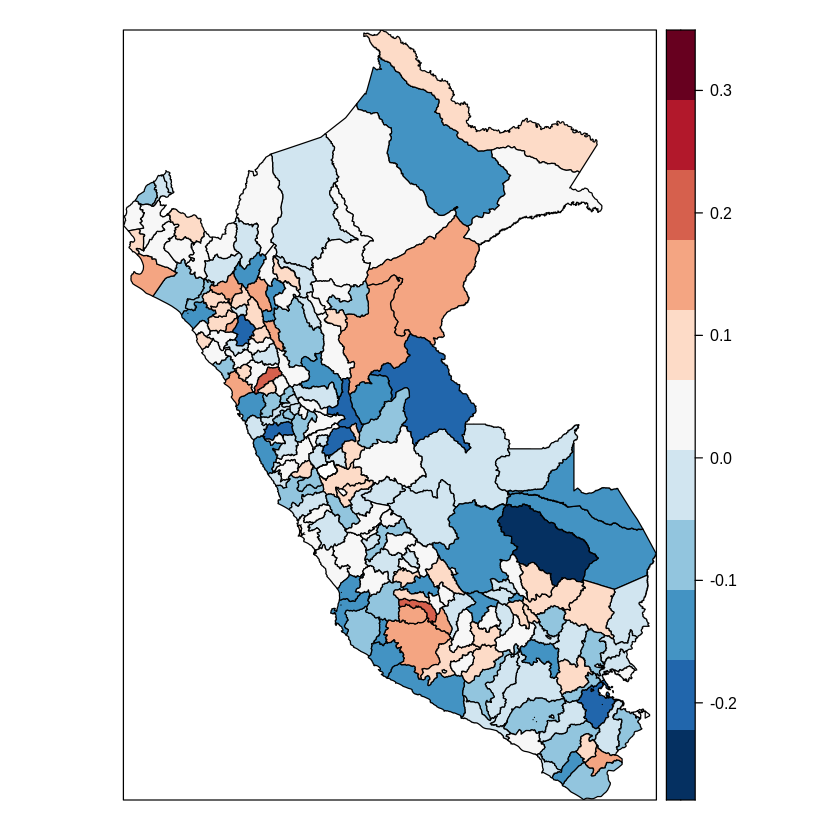

In [66]:
# Gráficando los residuos SAR
spplot(peru_sh,"sar_model.res", 
       at=seq(min(peru_sh@data$sar_model.res, na.rm=TRUE),
              max(peru_sh@data$sar_model.res,na.rm=TRUE),length=12),
       col.regions=rev(brewer.pal(11,"RdBu")))

### Efectos Directos e Indirectos

In [67]:
impacts(sar_model, listw=W)

Impact measures (lag, exact):
              Direct  Indirect     Total
p_rur_17   0.3772565 0.2795108 0.6567674
tdesemp_17 0.9168361 0.6792874 1.5961235

### Modelo SEM

In [68]:
errorsalm_model <- errorsarlm(model, 
                            data=peru_sh@data, W)
summary(errorsalm_model)


Call:errorsarlm(formula = model, data = peru_sh@data, listw = W)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.2657400 -0.0602343  0.0019779  0.0641352  0.3442048 

Type: error 
Coefficients: (asymptotic standard errors) 
            Estimate Std. Error z value  Pr(>|z|)
(Intercept) 0.081145   0.025867  3.1370  0.001707
p_rur_17    0.422689   0.037681 11.2176 < 2.2e-16
tdesemp_17  1.179950   0.364248  3.2394  0.001198

Lambda: 0.55203, LR test value: 32.941, p-value: 9.4991e-09
Asymptotic standard error: 0.076174
    z-value: 7.247, p-value: 4.261e-13
Wald statistic: 52.519, p-value: 4.2621e-13

Log likelihood: 189.1491 for error model
ML residual variance (sigma squared): 0.007916, (sigma: 0.088972)
Number of observations: 196 
Number of parameters estimated: 5 
AIC: -368.3, (AIC for lm: -337.36)


### Modelo SDM

In [70]:
durbin_model <- lagsarlm(POBREZA ~ p_rur_17 + p_jefa_17 + tdesemp_17, data=peru_sh@data, W, type="mixed");
summary(durbin_model)


Call:lagsarlm(formula = POBREZA ~ p_rur_17 + p_jefa_17 + tdesemp_17, 
    data = peru_sh@data, listw = W, type = "mixed")

Residuals:
        Min          1Q      Median          3Q         Max 
-2.7050e-01 -5.7568e-02  4.8801e-05  5.7339e-02  3.4721e-01 

Type: mixed 
Coefficients: (asymptotic standard errors) 
                Estimate Std. Error z value  Pr(>|z|)
(Intercept)    -0.003379   0.046384 -0.0728 0.9419271
p_rur_17        0.344159   0.046062  7.4716 7.927e-14
p_jefa_17      -0.380759   0.208535 -1.8259 0.0678685
tdesemp_17      1.368421   0.376808  3.6316 0.0002816
lag.p_rur_17   -0.042355   0.078298 -0.5410 0.5885414
lag.p_jefa_17   0.384818   0.255567  1.5057 0.1321329
lag.tdesemp_17 -1.039510   0.587392 -1.7697 0.0767766

Rho: 0.52748, LR test value: 30.657, p-value: 3.0789e-08
Asymptotic standard error: 0.07783
    z-value: 6.7774, p-value: 1.2238e-11
Wald statistic: 45.933, p-value: 1.2238e-11

Log likelihood: 193.523 for mixed model
ML residual variance (sigma square

In [71]:
impacts(durbin_model, listw=W)

Impact measures (mixed, exact):
               Direct   Indirect      Total
p_rur_17    0.3634195  0.2752924 0.63871193
p_jefa_17  -0.3552997  0.3638898 0.00859007
tdesemp_17  1.3244569 -0.6283745 0.69608241

### Modelo SLX

In [74]:
SLX_model <- lmSLX(POBREZA ~ p_rur_17 + p_jefa_17 + tdesemp_17, 
             peru_sh@data, W, Durbin = TRUE);
summary(SLX_model)


Call:
lm(formula = formula(paste("y ~ ", paste(colnames(x)[-1], collapse = "+"))), 
    data = as.data.frame(x), weights = weights)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27783 -0.06804  0.00027  0.06538  0.35284 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.05503    0.05241   1.050  0.29507    
p_rur_17        0.35733    0.05235   6.826 1.15e-10 ***
p_jefa_17      -0.30000    0.23709  -1.265  0.20730    
tdesemp_17      1.29775    0.42829   3.030  0.00279 ** 
lag.p_rur_17    0.22192    0.07629   2.909  0.00406 ** 
lag.p_jefa_17   0.19148    0.29045   0.659  0.51054    
lag.tdesemp_17 -0.67361    0.66304  -1.016  0.31095    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09927 on 189 degrees of freedom
Multiple R-squared:  0.5546,	Adjusted R-squared:  0.5405 
F-statistic: 39.22 on 6 and 189 DF,  p-value: < 2.2e-16
